In [1]:
import numpy as np

from graspologic.inference import LatentPositionTest, lpt_function
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [6]:
n_components = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
p_vals_function = []
p_vals_class = []

In [8]:
dfs = []

for n in range(50, 101, 10):

    temp_df = pd.DataFrame()
    A1 = sbm([n]*4, P)
    A2 = sbm([n]*4, P)

    lpt_class = LatentPositionTest(n_bootstraps=100, n_components=n_components)
    lpt_class.fit(A1, A2)
    p_val_class = lpt_class.p_value_

    p_val_func, _, _ = lpt_function(A1, A2, n_bootstraps=100, n_components=n_components)
    
    p_vals_function.append(p_val_func)
    p_vals_class.append(p_val_class)
    temp_df["p-val_diff"] = p_val_class - p_val_func
    temp_df["n_verts"] = n
    dfs.append(temp_df)
    print(lpt_class.p_value_ - p_val_func)
    print(dfs)
    
p_vals_dict = {"p-values class": p_vals_class, "p-values function": p_vals_function}
df = pd.DataFrame(p_vals_dict)
df.to_csv('p_values_lpt.csv')

0.02970297029702973
[Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: []]
0.009900990099009799
[Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: []]
0.02970297029702962
[Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: []]
-0.01980198019801982
[Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: []]
-0.029702970297029674
[Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: [], Empty DataFrame
Columns: [p-val_diff, n_verts]
Index: []]
0.01980198019801982
[

ValueError: Could not interpret input 'p_val_diff'

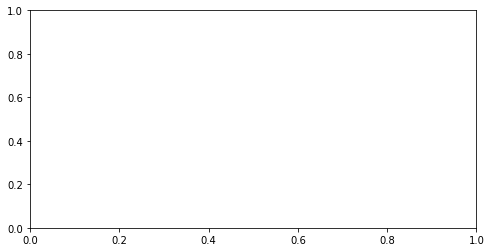

In [4]:
p_val_diff_df = pd.concat(dfs, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.stripplot(data=p_val_diff_df,
    x="n_verts",
    y="p_val_diff",
    ax=ax,
    alpha=0.5,
    jitter=0.45,
    palette="deep",
)

In [ ]:
plt.plot(n_verts_list, p_val_diff)
plt.xlabel("n_verts")
plt.ylabel("p-value difference")
plt.title("lpt class vs function")
plt.show()